# <center><br> <center><strong style="font-size: 50px;"> ML TERM 5: KNN(k-NEAREST NEIGHBORS) </strong></center></center> <br> <center><b style="font-size: 20px;">Prepared By - Subhasish Sinha</b></center>


### *INTRODUCTION: K-Nearest Neighbor(KNN) Algorithm for Machine Learning* ###

- K--Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.

- K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

- K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new
data appears then it can be easily classified into a well suite category by using K- NN algorithm.

- K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.

- K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.

- It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.

- KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.

- Example: Suppose, we have an image of a creature that looks similar to cat and dog, but we want to know either it is a cat or dog. So for this identification, we can use the KNN algorithm, as it works on a similarity measure. Our KNN model will find the similar features of the new data set to the cats and dogs images and based on the most similar features it will put it in either cat or dog category.
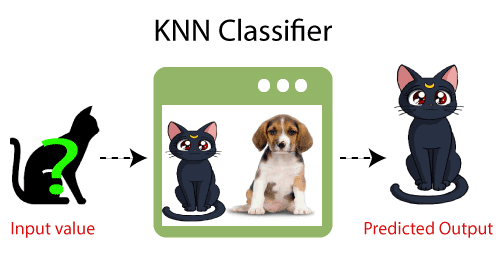

### *How does K-NN work?* ###
The K-NN working can be explained on the basis of the below algorithm:

Step-1: Select the number K of the neighbors
Step-2: Calculate the Euclidean distance of K number of neighbors
Step-3: Take the K nearest neighbors as per the calculated Euclidean distance.
Step-4: Among these k neighbors, count the number of the data points in each category.
Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.
Step-6: Our model is ready.
Suppose we have a new data point and we need to put it in the required category. Consider the below image:

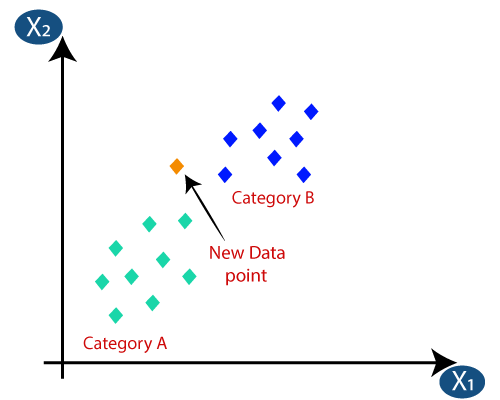

Firstly, we will choose the number of neighbors, so we will choose the k=5.
Next, we will calculate the Euclidean distance between the data points. The Euclidean distance is the distance between two points, which we have already studied in geometry. It can be calculated as:
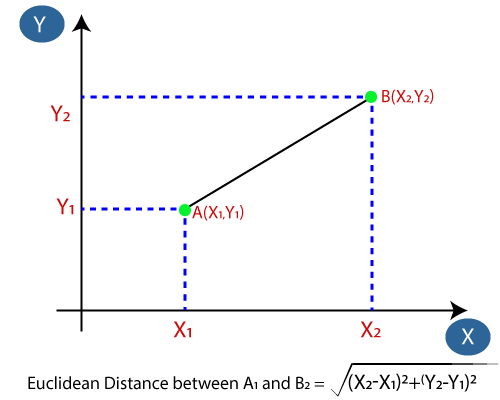

By calculating the Euclidean distance we got the nearest neighbors, as three nearest neighbors in category A and two nearest neighbors in category B. Consider the below image:

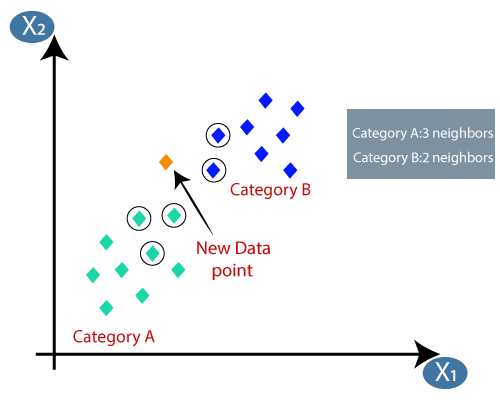

As we can see the 3 nearest neighbors are from category A, hence this new data point must belong to category A.

### *Distance Metrics Used in KNN Algorithm* ###
As we know that the KNN algorithm helps us identify the nearest points or the groups for a query point. But to determine the closest groups or the nearest points for a query point we need some metric. For this purpose, we use below distance metrics:

Euclidean Distance:
This is nothing but the cartesian distance between the two points which are in the plane/hyperplane. Euclidean distance can also be visualized as the length of the straight line that joins the two points which are into consideration. This metric helps us calculate the net displacement done between the two states of an object.

image.png   

Manhattan Distance:
Manhattan Distance metric is generally used when we are interested in the total distance traveled by the object instead of the displacement. This metric is calculated by summing the absolute difference between the coordinates of the points in n-dimensions.

image.png

Minkowski Distance:
We can say that the Euclidean, as well as the Manhattan distance, are special cases of the Minkowski distance.

image.png  

From the formula above we can say that when p = 2 then it is the same as the formula for the Euclidean distance and when p = 1 then we obtain the formula for the Manhattan distance.

Hamming distance:
Hamming distance between two strings or vectors of equal length is the number of positions at which the corresponding symbols are different. In other words, it measures the minimum number of substitutions required to change one string into the other, or equivalently, the minimum number of errors that could have transformed one string into the other. In a more general context, the Hamming distance is one of several string metrics for measuring the edit distance between two sequences.

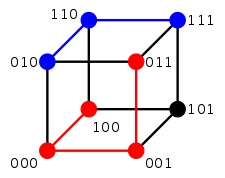

Two example distances: 100→011 has distance 3; 010→111 has distance 2
The minimum distance between any two vertices is the Hamming distance between the two binary strings.

### *Types of K NN* ###

The K-Nearest Neighbors (KNN) algorithm can be primarily categorized into two types:

- Standard (Unweighted) KNN
- Weighted KNN
Let's explore these types with practical examples and provide simple visualizations:

1. Standard (Unweighted) KNN
In standard KNN, the class of a new instance is determined by the majority vote of its
k nearest neighbors. Each neighbor has the same vote regardless of its distance from the point to be classified.

Practical Example:
Imagine a dataset of fruit, with features such as weight and sugar content. To classify a new fruit as either 'Apple' or 'Orange', standard KNN looks at the
k closest points in the feature space and chooses the most common class among them.

2. Weighted KNN
In weighted KNN, each of the k nearest neighbors votes on the classification, but the votes are weighted by the inverse of their distance to the new instance. This means closer neighbors have more influence on the classification than those further away.

Practical Example:
Again consider the same fruit dataset. For weighted KNN, if a new fruit is very close to several apples but slightly further away from an orange, the apples will have a stronger influence on the classification because of their proximity, even if there are more oranges a bit further away.

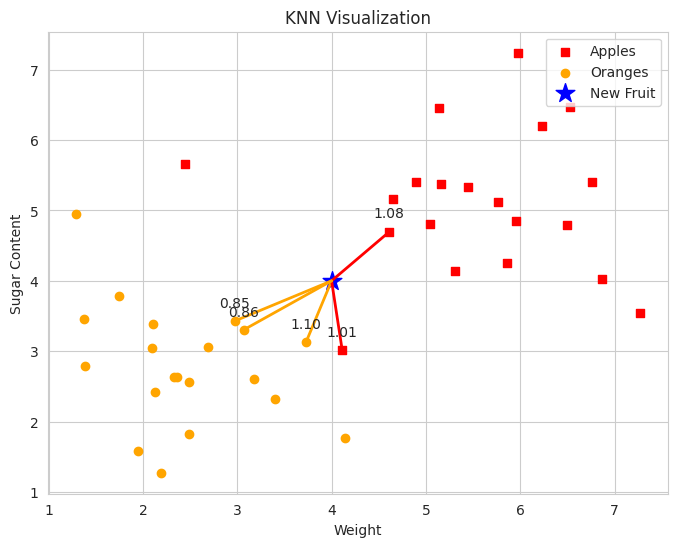

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Set random seed for reproducibility
np.random.seed(0)

# Generate some data for Apples (class 0) and Oranges (class 1)
apples = np.random.normal(loc=5.0, scale=1.0, size=(20, 2))
oranges = np.random.normal(loc=3.0, scale=1.0, size=(20, 2))

# New fruit (star) whose class we want to predict
new_fruit = np.array([[4.0, 4.0]])

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(apples[:, 0], apples[:, 1], color='red', marker='s', label='Apples')
plt.scatter(oranges[:, 0], oranges[:, 1], color='orange', marker='o', label='Oranges')
plt.scatter(new_fruit[:, 0], new_fruit[:, 1], color='blue', marker='*', s=200, label='New Fruit')

# Calculate distances from the new fruit to all other fruits
distances = np.sqrt(np.sum((np.vstack((apples, oranges)) - new_fruit) ** 2, axis=1))

# Number of neighbors
k = 5

# Get the indices of the k nearest neighbors
nearest_neighbors = np.argsort(distances)[:k]

# Highlight the k nearest neighbors
for neighbor in nearest_neighbors:
    if neighbor < len(apples):
        plt.plot([apples[neighbor, 0], new_fruit[0, 0]], [apples[neighbor, 1], new_fruit[0, 1]],
                 color='red', linestyle='-', linewidth=2)
    else:
        plt.plot([oranges[neighbor - len(apples), 0], new_fruit[0, 0]],
                 [oranges[neighbor - len(apples), 1], new_fruit[0, 1]],
                 color='orange', linestyle='-', linewidth=2)

# Annotate the k nearest neighbors with their weights (1/distance)
for i, neighbor in enumerate(nearest_neighbors):
    weight = 1 / distances[neighbor]
    plt.annotate(f'{weight:.2f}', (np.vstack((apples, oranges))[neighbor, 0],
                                   np.vstack((apples, oranges))[neighbor, 1]),
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.title('KNN Visualization')
plt.xlabel('Weight')
plt.ylabel('Sugar Content')
plt.legend()
plt.grid(True)
plt.show()

Here is a visualization for the K-Nearest Neighbors (KNN) concept:

Apples are represented as red squares.
Oranges are represented as orange circles.
The new fruit we want to classify is marked with a blue star.

The lines connect the new fruit to its five nearest neighbors in the dataset. The thickness of the lines represents the weight of each neighbor in the decision process of the weighted KNN algorithm. The weights, which are inversely proportional to the distance, are annotated next to each of the nearest neighbors.

In a standard KNN scenario, we would simply count the number of apples and oranges among the five nearest neighbors and assign the class based on the majority. For example, if there are three apples and two oranges, the new fruit would be classified as an apple.

In a weighted KNN scenario, the classification would take into account not just the count of the nearest neighbors but also their distance from the new fruit. The closer a neighbor is, the more influence it has on the classification. The weights annotated next to the neighbors are inversely related to their distance from the new fruit—the closer the neighbor, the higher the weight.

To determine the class of the new fruit using weighted KNN, we would calculate a weighted sum of the classes of the neighbors. If the sum of weights for apples is greater than the sum for oranges, the new fruit would be classified as an apple, and vice versa.

The choice between standard and weighted KNN would depend on the specific characteristics of the data and the problem at hand. For example, if we know that the class of a fruit is highly dependent on its immediate neighbors, a weighted KNN might be more appropriate. If, however, all neighbors are considered to have an equal influence, a standard KNN would be sufficient.

### *How to select the value of K in the K-NN Algorithm?* ###
Choosing the value of k in the K-Nearest Neighbors (KNN) algorithm is crucial as it directly influences the classification or regression results. Here are the key considerations and methods for selecting the value of k:

1. Rule of Thumb
A common rule of thumb is setting k to the square root of the number of instances in the training dataset. However, this is only a starting point and may not yield the best results.

2. Cross-Validation
The most reliable method is using cross-validation, especially k-fold cross-validation. This involves splitting the training data into k subsets and using one subset as the validation set and the others for training, iterating this process k times. The value of k that results in the highest validation accuracy is chosen.

3. Bias-Variance Tradeoff
The value of k affects the bias-variance tradeoff:
A smaller k leads to a model with low bias and high variance, which can overfit the training data (sensitive to noise).
A larger k leads to a model with high bias and low variance, which can underfit the training data (oversmooth boundaries).

4. Error Rate
Plot the error rate for the algorithm against various k values. The k at which the error rate starts to increase or stabilize indicates diminishing returns on model accuracy and can be a good choice.

5. Distance Weighted KNN
Instead of choosing a single k, weighted KNN assigns a weight to the contributions of each neighbor, so that nearer neighbors contribute more to the final vote than the further ones. This can sometimes mitigate the need to find the optimal k.

6. Domain Knowledge
Domain knowledge can also play a role in selecting k. For example, if you know that a certain number of neighbors are typically influential in the domain context, you might start with that number.

7. Computational Complexity
A larger k means a longer computation time, which might be impractical for very large datasets. Thus, computational constraints may also influence the choice of k.

8. Class Imbalance
In datasets with a significant class imbalance, the value of k should be chosen so that the minority class is appropriately represented in the neighbors.

9. Experimentation
Often, the choice of k comes down to experimentation. Trying out a range of values and comparing the model's performance on a validation set is usually the most pragmatic approach.

### *Advantages and Disadvantages of K NN Algorithm* ###
*Advantages of the KNN Algorithm*

- Easy to implement as the complexity of the algorithm is not that high.

- Adapts Easily – As per the working of the KNN algorithm it stores all the data in memory storage and hence whenever a new example or data point is added then the algorithm adjusts itself as per that new example and has its contribution to the future predictions as well.

- Few Hyperparameters – The only parameters which are required in the training of a KNN algorithm are the value of k and the choice of the distance metric which we would like to choose from our evaluation metric.



*Disadvantages of the KNN Algorithm*

- Does not scale – As we have heard about this that the KNN algorithm is also considered a Lazy Algorithm. The main significance of this term is that this takes lots of computing power as well as data storage. This makes this algorithm both time-consuming and resource exhausting.
    
- Curse of Dimensionality – There is a term known as the peaking phenomenon according to this the KNN algorithm is affected by the curse of dimensionality which implies the algorithm faces a hard time classifying the data points properly when the dimensionality is too high.
    
- Prone to Overfitting – As the algorithm is affected due to the curse of dimensionality it is prone to the problem of overfitting as well. Hence generally feature selection as well as dimensionality reduction techniques are applied to deal with this problem.

### *Applications of the KNN Algorithm* ###
1. Data Preprocessing – While dealing with any Machine Learning problem we first perform the EDA part in which if we find that the data contains missing values then there are multiple imputation methods are available as well. One of such method is KNN Imputer which is quite effective ad generally used for sophisticated imputation methodologies.

2. Pattern Recognition – KNN algorithms work very well if you have trained a KNN algorithm using the MNIST dataset and then performed the evaluation process then you must have come across the fact that the accuracy is too high.

3. Recommendation Engines – The main task which is performed by a KNN algorithm is to assign a new query point to a pre-existed group that has been created using a huge corpus of datasets. This is exactly what is required in the recommender systems to assign each user to a particular group and then provide them recommendations based on that group’s preferences.

### **Project -Autism Spectrum Disorder Classification using KNN** #

---
### **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)
  - **4.3** [**Data Profiling Report**](#Section43)

**5.** [**Data Pre-processing**](#Section5)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>

**7.** [**Post Data Processing**](#Section7)<br>

**8.** [**Model Development & Evaluation**](#Section8)

<a id = Section1></a>

---
# **1. About the Dataset**

---
**Autistic Spectrum Disorder (ASD)** is a neurodevelopmental  condition associated with significant healthcare costs, and early diagnosis can significantly reduce these. Unfortunately, waiting times for an ASD diagnosis are lengthy and procedures are not cost effective.  Therefore, a time-efficient and accessible ASD screening is imminent to **help health professionals** and inform individuals whether they should **pursue** formal clinical diagnosis.
This dataset was created by Dr Fadi Fayez Thabtah ([Research Paper](https://dl.acm.org/doi/abs/10.1145/3107514.3107515)) using a mobile app called **ASDTests** (ASDtests.com) to screen **autism in toddlers**. This contains influential features to be utilised for further analysis especially in **determining autistic traits** and **improving the classification of ASD cases**. In this dataset, we record **ten behavioural features (Q-Chat-10)** plus other individuals characteristics that have proved to be effective in detecting the ASD cases from controls in behaviour science.





<img src="https://ceufast.com/imgs/autism_ninja_1140px.jpg" alt="Alternative text" />

<a id = Section2></a>

---
# **2. Problem Statement**
---

- The main aim of this case study is to **classify** a group of toddlers into **being in the autistic spectrum or not** based on a group of questions designed by the autistism research centre at University of Cambridge ([Q-Chat-10](https://www.autismalert.org/uploads/PDF/SCREENING--AUTISM--QCHAT-10%20Question%20Autism%20Survey%20for%20Toddlers.pdf))
- The classification will be accomplished with the help of **K-Nearest Neighbors**(KNN) Algorithm

<a id = Section3></a>

---
# **3. Installing and importing libraries**
---

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

<a id = Section4></a>

---
# **4. Data Acquisition and Description**
---

- The data is based on the **ten behavioural features ([Q-Chat-10](https://www.autismalert.org/uploads/PDF/SCREENING--AUTISM--QCHAT-10%20Question%20Autism%20Survey%20for%20Toddlers.pdf))** plus other individuals characteristics that have proved to be **effective** in detecting the **ASD cases** from controls in behaviour science

-  For questions **A1-A9**: if you circle an answer in **columns C, D or E**, **score 1** point per question. For **question A10**: if you
circle an answer in **columns A, B or C**, **score 1** point. Add points together for all ten questions. If your child scores **more than 3** out of 10, the health professional **may consider** referring your child for a multi-disciplinary assessment.

- The **Class/ASD Traits** variable is our target class

---


| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 1054 | 19 | 69 KB |

---

| Id | Features | Description |
| :-- | :--|  :--
|01| **Case_No** |IIndex of the cases |
|02| **A1** |Does your child look at you when you call his/her name?
|03| **A2** |How easy is it for you to get eye contact with your child? |
|04| **A3** |Does your child point to indicate that s/he wants something (eg: a toy that is out of reach)|
|05| **A4** |Does your child point to share interest with you? (e.g. pointing at an interesting sight)
|06| **A5** |Does your child pretend? (e.g. care for dolls, talk on a toy phone)
|07| **A6** |Does your child follow where you’re looking?
|08| **A7** |If you or someone else in the family is visibly upset, does your child show signs of wanting to comfort them? (e.g. stroking hair, hugging them)
|09| **A8** |Would you describe your child’s first words as:
|10| **A9** |Does your child use simple gestures? (e.g. wave goodbye)
|11| **A10** |Does your child stare at nothing with no apparent purpose?
|12| **Age_mons** | Age in months|
|13| **Qchat-10-Score** | Scores as described above|
|14| **Sex** | Sex of the toddler|
|15| **Ethnicity** | Ethnic Background of the toddler|
|16| **Jaundice** | Suffered from Jaundice|
|17| **Family_mem_with_ASD** | Family history of Autism|
|18| **Who completed the test** | Who filled out the questionare|
|19| **Class/ASD Traits** |Lies in the Autistic Spectrum or not|


In [16]:
data = pd.read_csv('https://raw.githubusercontent.com/subhasishsinha12/MLProjects/main/Autism%20Spectrum%20Disorder%20Classification%20using%20KNN/Toddler_Autism_dataset_July_2018.csv')
print("Data Shape: ", data.shape)

# Display the first few rows of the dataset
data.head()

Data Shape:  (1054, 19)


,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


<a id = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [4]:
data.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


**Observations:**

Feature Values: The A1 to A10 features, which represent responses to the Q-Chat-10 questions, are binary (0 or 1). The summary shows varying means across these questions, indicating differing levels of agreement or presence of specific behaviors associated with ASD.

Age Distribution: The Age_Mons feature, representing the age of toddlers in months, ranges from 12 to 36 months. The mean age is approximately 27.87 months, with a standard deviation of around 7.98 months, suggesting a broad age range of toddlers included in the study.

Qchat-10-Score: The Qchat-10-Score, which is a summative score based on responses to the Q-Chat-10, ranges from 0 to 10. The mean score is about 5.21, with a standard deviation of approximately 2.91, indicating variability in the autism spectrum traits among the toddlers.

<a id = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

**Observations:**
- There are **19 features**, out of which **13 are int datatype** and **6 are object type values**

- **Class/ASD Traits** is our **target** variable which is categorical in nature

<a id = Section43></a>
### **4.3 Data Pre Profiling**



In [6]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Identifying redundant and duplicate count
def duplicate_count(df):
  print(f'Contains Redundant Records:', df.duplicated().any())
  print('Duplicate Count:', df.duplicated().sum())

# Identifying categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [7]:
missing_values[missing_values > 0] # Display columns with missing values, if any

Series([], dtype: int64)

In [8]:
duplicate_count(data)

Contains Redundant Records: False
Duplicate Count: 0


In [9]:
categorical_cols,numerical_cols

(['Sex',
  'Ethnicity',
  'Jaundice',
  'Family_mem_with_ASD',
  'Who completed the test',
  'Class/ASD Traits '],
 ['Case_No',
  'A1',
  'A2',
  'A3',
  'A4',
  'A5',
  'A6',
  'A7',
  'A8',
  'A9',
  'A10',
  'Age_Mons',
  'Qchat-10-Score'])

In [10]:
# Checking the number of unique values in each categorical column of data
print("Number of unique values in each categorical column of data:")
for col in categorical_cols:
    print(f"{col}: {data[col].nunique()}")

Number of unique values in each categorical column of data:
Sex: 2
Ethnicity: 11
Jaundice: 2
Family_mem_with_ASD: 2
Who completed the test: 5
Class/ASD Traits : 2


<a id = Section5></a>
# **5. Data Pre-Processing**



In [17]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode binary categorical variables
binary_columns = ['Sex', 'Jaundice', 'Family_mem_with_ASD']
data[binary_columns] = data[binary_columns].apply(LabelEncoder().fit_transform)

# One-hot encode 'Ethnicity' and 'Who completed the test' columns
data = pd.get_dummies(data, columns=['Ethnicity', 'Who completed the test'], drop_first=True)

# Adjust 'Class/ASD Traits ' column name due to a trailing space issue and encode it
data['Class/ASD Traits'] = LabelEncoder().fit_transform(data['Class/ASD Traits '])
data.drop(['Class/ASD Traits '], axis=1, inplace=True)

# Standardize 'Age_Mons' and 'Qchat-10-Score'
scaler = StandardScaler()
data[['Age_Mons', 'Qchat-10-Score']] = scaler.fit_transform(data[['Age_Mons', 'Qchat-10-Score']])

# Statistical Summary of the dataset
statistical_summary = data.describe()

statistical_summary

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Ethnicity_south asian,Who completed the test_Health care professional,Who completed the test_Others,Who completed the test_Self,Who completed the test_family member,Class/ASD Traits
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,...,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,...,0.283681,0.050285,0.178368,0.007590,0.056926,0.004744,0.002846,0.003795,0.965844,0.690702
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,...,0.450998,0.218635,0.383004,0.086831,0.231811,0.068745,0.053300,0.061516,0.181715,0.462424
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<a id = Section6></a>
# **6. Exploratory Data Analysis**

In [18]:
# Plot to get the frequency distribution of the target variable in the data
def countplot(df):
  plt.figure(figsize = (10,5))
  sns.countplot(x='Class/ASD Traits',data=df)
  plt.title("Distribution of the Target Variable", fontsize=18)
  plt.xticks(ticks = [0,1])

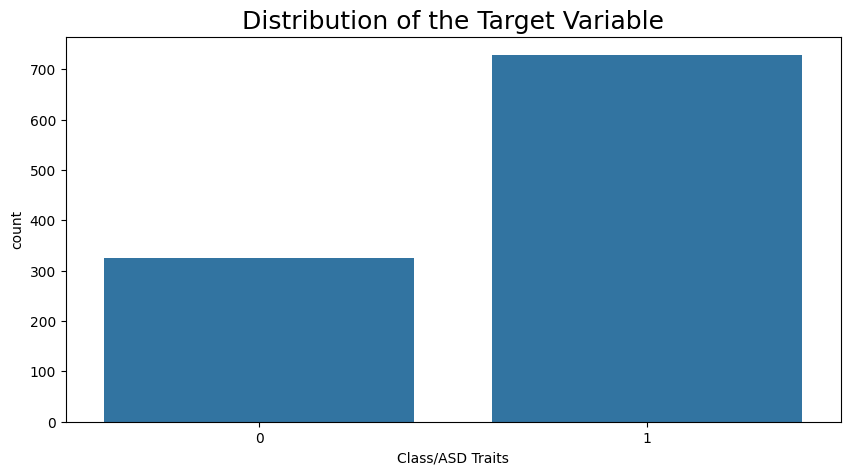

In [19]:
countplot(data)

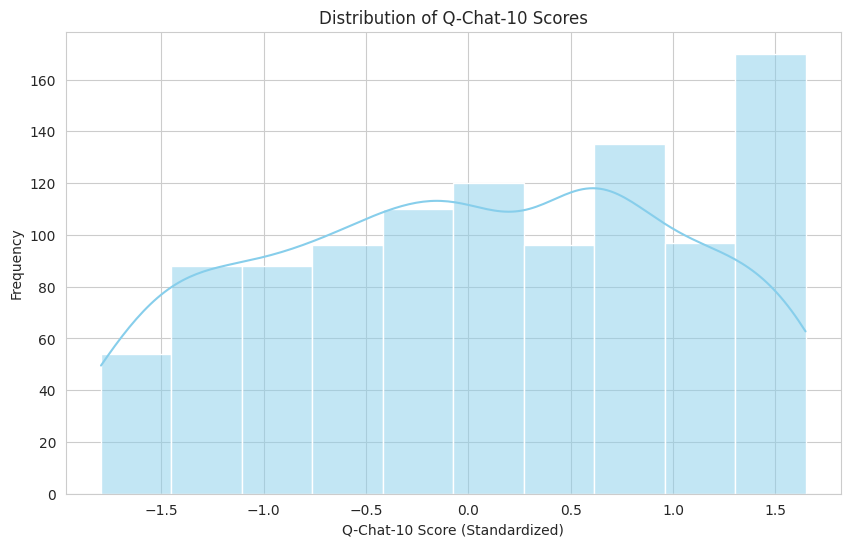

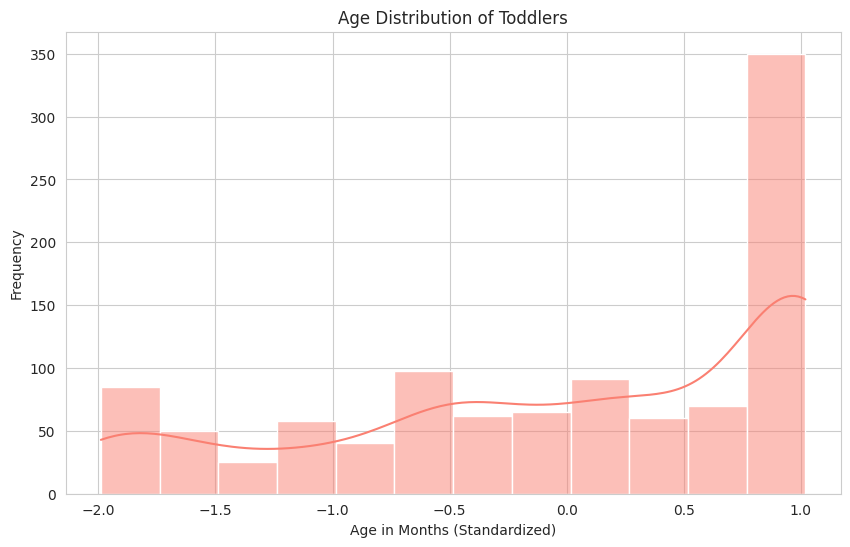

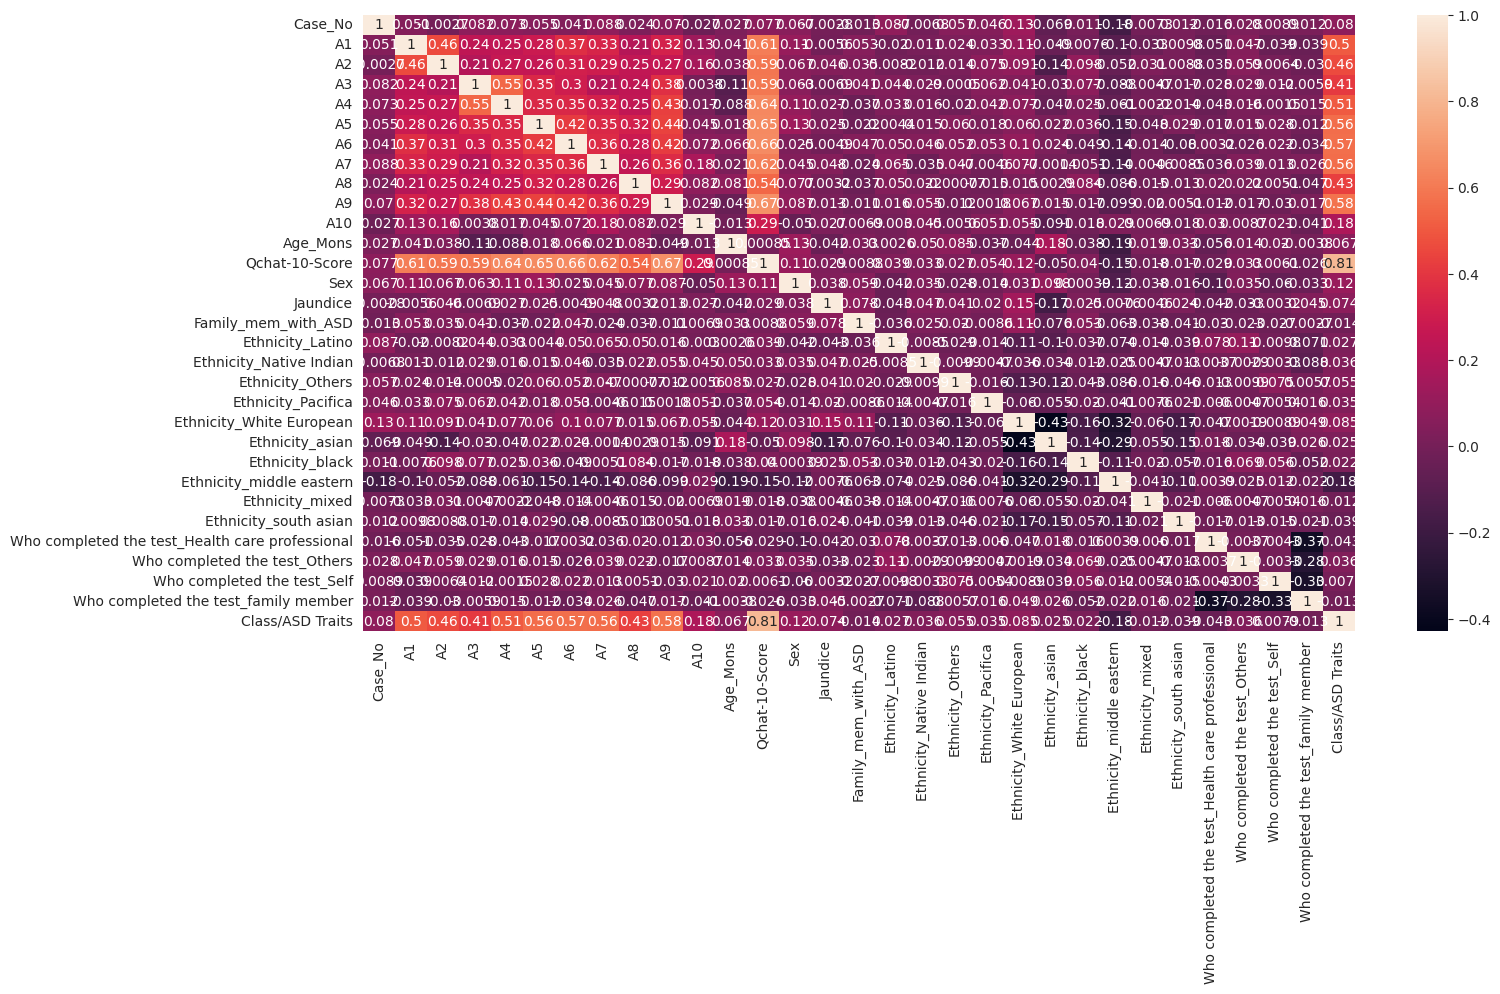

In [20]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting distributions of the Q-Chat-10 Scores
plt.figure(figsize=(10, 6))
sns.histplot(data['Qchat-10-Score'], kde=True, bins=10, color="skyblue")
plt.title('Distribution of Q-Chat-10 Scores')
plt.xlabel('Q-Chat-10 Score (Standardized)')
plt.ylabel('Frequency')
plt.show()

# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Age_Mons'], kde=True, color="salmon")
plt.title('Age Distribution of Toddlers')
plt.xlabel('Age in Months (Standardized)')
plt.ylabel('Frequency')
plt.show()

# Heat Map
def heatmap(df):
  plt.figure(figsize=(16,8))
  sns.heatmap(df.corr(), annot=True)

heatmap(data)

<a id = Section7></a>

---
# **7. Post Data Processing**
---

In [21]:
# Dropping the 'Case_No' column as it's just an identifier
data_processed = data.drop(['Case_No'], axis=1)

In [24]:
# Splitting the dataset into features (X) and target (y)
X = data_processed.drop(['Class/ASD Traits'], axis=1)
y = data_processed['Class/ASD Traits']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verifying the shapes of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((843, 29), (211, 29), (843,), (211,))

<a id = Section8></a>

---
# **8. Model Development & Evaluation**
---

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [26]:
# Training the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # Starting with n_neighbors=5
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [27]:
# Making predictions on the testing set
y_pred = knn.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep

(0.9620853080568721,
 '              precision    recall  f1-score   support\n\n           0       0.90      1.00      0.95        69\n           1       1.00      0.94      0.97       142\n\n    accuracy                           0.96       211\n   macro avg       0.95      0.97      0.96       211\nweighted avg       0.97      0.96      0.96       211\n')

In [28]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

Fitting 5 folds for each of 54 candidates, totalling 270 fits


({'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'},
 0.9750704423781347)

In [29]:
# Retraining the KNN model with the optimized parameters
knn_optimized = KNeighborsClassifier(n_neighbors=15, weights='uniform', metric='euclidean')
knn_optimized.fit(X_train, y_train)

# Making predictions on the testing set with the optimized model
y_pred_optimized = knn_optimized.predict(X_test)

# Evaluating the optimized model
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
classification_rep_optimized = classification_report(y_test, y_pred_optimized)

accuracy_optimized, classification_rep_optimized

(0.976303317535545,
 '              precision    recall  f1-score   support\n\n           0       0.94      0.99      0.96        69\n           1       0.99      0.97      0.98       142\n\n    accuracy                           0.98       211\n   macro avg       0.97      0.98      0.97       211\nweighted avg       0.98      0.98      0.98       211\n')

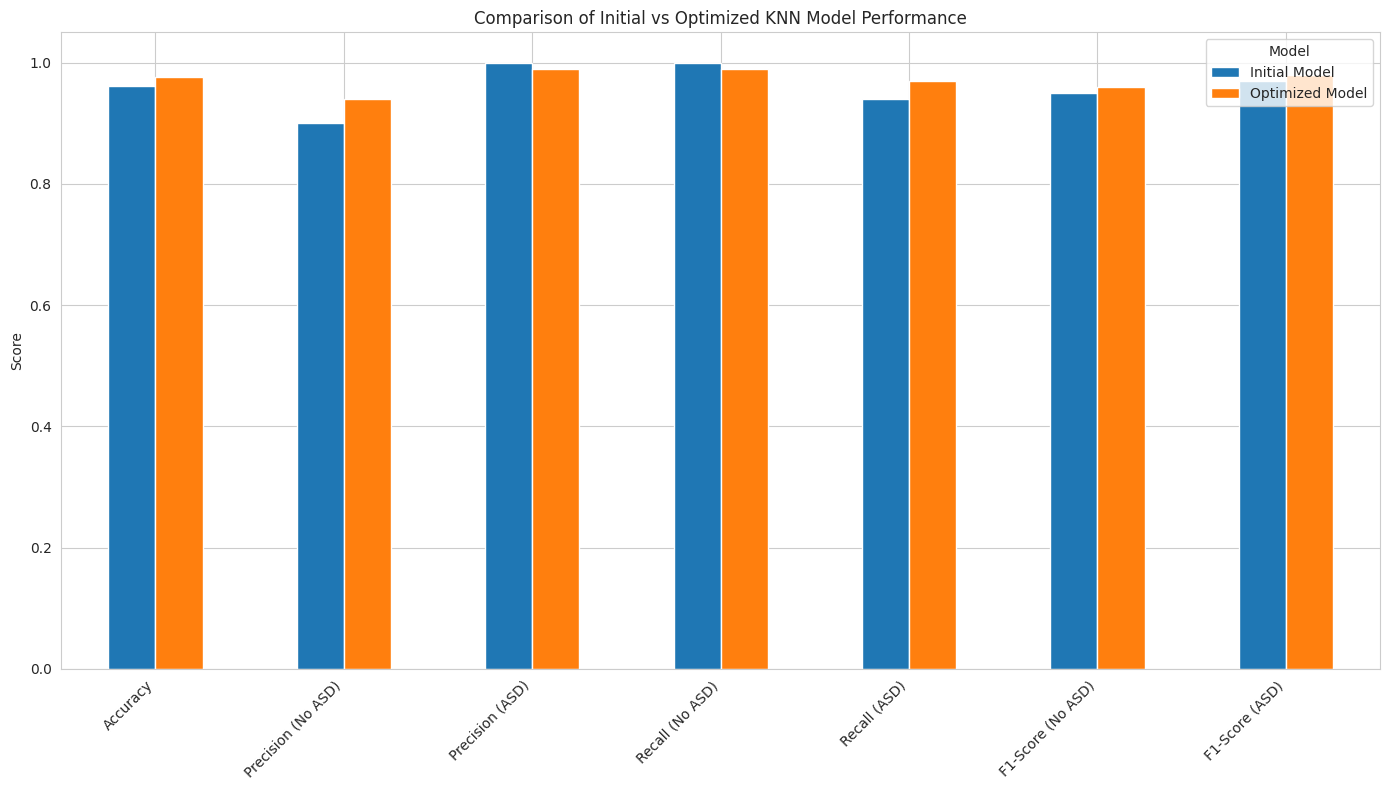

In [31]:
# Organizing the results into a dictionary for easier visualization
results = {
    'Initial Model': {
        'Accuracy': 0.9620853080568721,
        'Precision (No ASD)': 0.90,
        'Precision (ASD)': 1.00,
        'Recall (No ASD)': 1.00,
        'Recall (ASD)': 0.94,
        'F1-Score (No ASD)': 0.95,
        'F1-Score (ASD)': 0.97,
    },
    'Optimized Model': {
        'Accuracy': 0.976303317535545,
        'Precision (No ASD)': 0.94,
        'Precision (ASD)': 0.99,
        'Recall (No ASD)': 0.99,
        'Recall (ASD)': 0.97,
        'F1-Score (No ASD)': 0.96,
        'F1-Score (ASD)': 0.98,
    }
}

# Converting the results dictionary into a DataFrame for easier plotting
results_df = pd.DataFrame(results)

# Plotting the results
results_df.plot(kind='bar', figsize=(14, 8))
plt.title('Comparison of Initial vs Optimized KNN Model Performance')
plt.ylabel('Score')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Model')
plt.tight_layout()

plt.show()

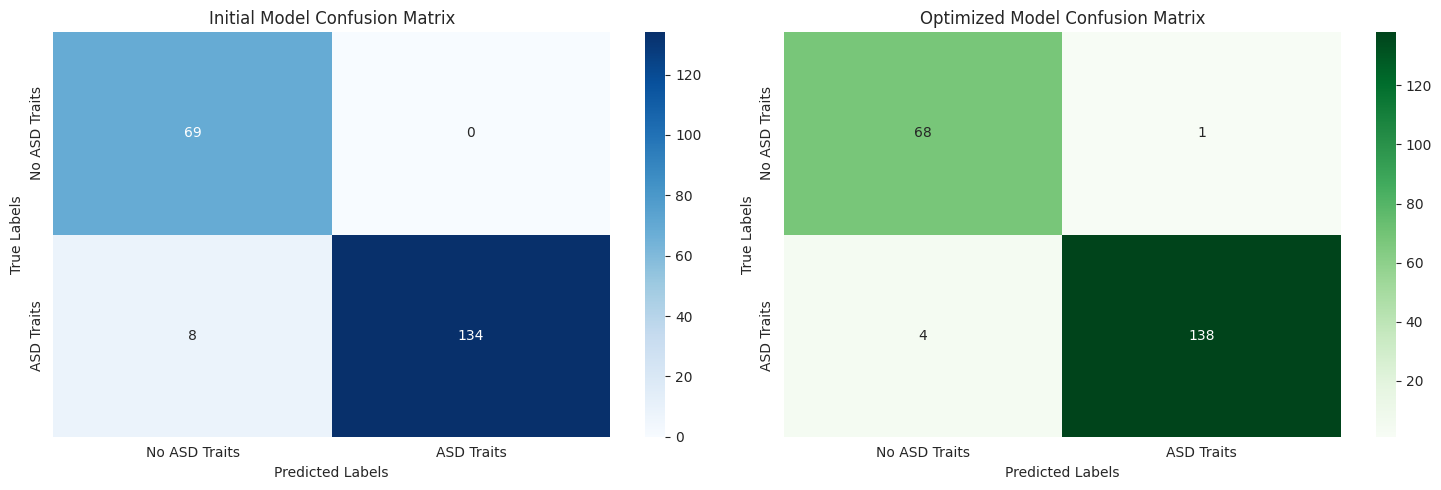

In [30]:
# Calculating confusion matrices for both models
conf_matrix_initial = confusion_matrix(y_test, y_pred)
conf_matrix_optimized = confusion_matrix(y_test, y_pred_optimized)

# Plotting the confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Initial Model Confusion Matrix
sns.heatmap(conf_matrix_initial, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Initial Model Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')
ax[0].set_xticklabels(['No ASD Traits', 'ASD Traits'])
ax[0].set_yticklabels(['No ASD Traits', 'ASD Traits'])

# Optimized Model Confusion Matrix
sns.heatmap(conf_matrix_optimized, annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title('Optimized Model Confusion Matrix')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')
ax[1].set_xticklabels(['No ASD Traits', 'ASD Traits'])
ax[1].set_yticklabels(['No ASD Traits', 'ASD Traits'])

plt.tight_layout()
plt.show()

## Observation: ##
- Initial Model Confusion Matrix (Left): This matrix shows the number of true positive, true negative, false positive, and false negative predictions made by the model before hyperparameter tuning. The model demonstrated high accuracy, with a very low number of misclassifications.

- Optimized Model Confusion Matrix (Right): After hyperparameter tuning, the confusion matrix indicates an even better performance, with fewer misclassifications than the initial model. This improvement is particularly noticeable in the reduction of false negatives and false positives, leading to higher precision and recall for both classes.